In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
from datetime import date
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score, KFold

from sklearn import linear_model

In [2]:
% matplotlib notebook

In [3]:
import matplotlib as mpl


In [4]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

In [5]:
def df_create():
    df_50 = pd.read_csv('player_list_50.csv')
    df_100 = pd.read_csv('player_list_100.csv')
    df_150 = pd.read_csv('player_list_150.csv')
    df_200 = pd.read_csv('player_list_200.csv')
    df_226 = pd.read_csv('player_list_226.csv')
    df = df_100.append([df_50,df_150, df_200,df_226], ignore_index= True).reset_index(drop = True)
    return df

def data_prep(df):
    cols =['full_name', 'player_id', 'age',
           'rating', 'potential', 'club', 
           'release_clause', 'club_joined', 
           'contract_valid', 'value', 'wage',
           'preff_foot', 'Acceleration', 'Aggression',
           'Agility', 'Balance', 'Ball Control',
           'Composure', 'Crossing', 'Curve', 
           'DOB', 'Dribbling', 'Finishing',
           'GK Diving', 'GK Handling', 'GK Kicking',
           'GK Positioning', 'GK Reflexes', 'Heading Accuracy', 
           'Interceptions', 'Jumping', 'Long Passing', 
           'Long Shots', 'Marking', 'Penalties', 'Positioning',
           'Reactions', 'Short Passing', 'Shot Power', 'Sliding Tackle',
           'Sprint Speed', 'Stamina', 'Standing Tackle', 'Strength', 'Vision',
           'Volleys', 'club_jersey', 'club_pos', 'role',
           'country', 'country_jersey', 'country_pos',
           'country_rating','height', 'international_rep', 
           'traits', 'weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
           'LCM', 'CM', 'RCM', 'RM', 
           'LWB', 'LDM', 'CDM', 'RDM',
           'RWB', 'LB', 'LCB', 
           'CB', 'RCB', 'RB']

    df['value'] = df['value'].apply(lambda x: float(x.strip('M'))*10**6 if 'M' in x  else (float(x.strip('K'))*10**3 if ('K' in x) else float(x) ))
    df['wage'] = df['wage'].apply(lambda x: float(x.strip('K'))*10**3 if 'K' in x  else 0 )
    df['release_clause'] = df['release_clause'].apply(lambda x: float(x.strip('M'))*10**6 if ((type(x) != float) and ('M' in x)) else (float(x.strip('K'))*10**3 if ((type(x) != float) and ('K' in x)) else 0 ))
    df['contract_valid'] = df['contract_valid'].apply(lambda x: int(x.split(',')[-1]))
    df['club_joined'] = df['club_joined'].apply(lambda x: datetime.strptime(x.replace(',', '').replace(' ', '-'), '%b-%d-%Y').date() if not 'Loaned' in x else date.today())
    df['traits'] = df.traits.fillna(0).apply(lambda x: len(x) if (type(x) != int) else 0)
    df['preff_foot'] = df.preff_foot.fillna(2).apply(lambda x: 1 if (x == 'Right') else 0)
    return df[cols]

def df_reg(df):
    

    reg_cols = [ 'age','preff_foot', 'Acceleration', 'Aggression',
               'Agility', 'Balance', 'Ball Control',
               'Composure', 'Crossing', 'Curve','Dribbling', 'Finishing',
               'GK Diving', 'GK Handling', 'GK Kicking',
               'GK Positioning', 'GK Reflexes', 'Heading Accuracy', 
               'Interceptions', 'Jumping', 'Long Passing', 
               'Long Shots', 'Marking', 'Penalties', 'Positioning',
               'Reactions', 'Short Passing', 'Shot Power', 'Sliding Tackle',
               'Sprint Speed', 'Stamina', 'Standing Tackle', 'Strength', 'Vision',
               'Volleys', 'height', 'international_rep', 
               'traits', 'weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
               'LCM', 'CM', 'RCM', 'RM', 
               'LWB', 'LDM', 'CDM', 'RDM',
               'RWB', 'LB', 'LCB', 
               'CB', 'RCB', 'RB']
    df_reg = df[df.release_clause > 0].dropna(how = 'any')
    
    X = df_reg[reg_cols].values
    
    y = df_reg['release_clause']
    
    return X,y, df_reg
    
    


def model_reg(X,y):
    
    lr = linear_model.LinearRegression()
    
    scores = cross_val_score(lr, X, y, cv= KFold(5, True))
    
    predicted = cross_val_predict(lr, X, y, cv=5)
    
    return scores, predicted
    


In [6]:
df = data_prep(df_create())
X, y = df_reg(df)[0:2]
scores, predicted = model_reg(X,y)

In [7]:
scores

array([ 0.69563982,  0.68718635,  0.67193953,  0.74075133,  0.68115864])

In [8]:
def plot_reg(predicted, y):
    fig, ax = plt.subplots()
    ax.scatter(y, predicted, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()
    return 

<IPython.core.display.Javascript object>


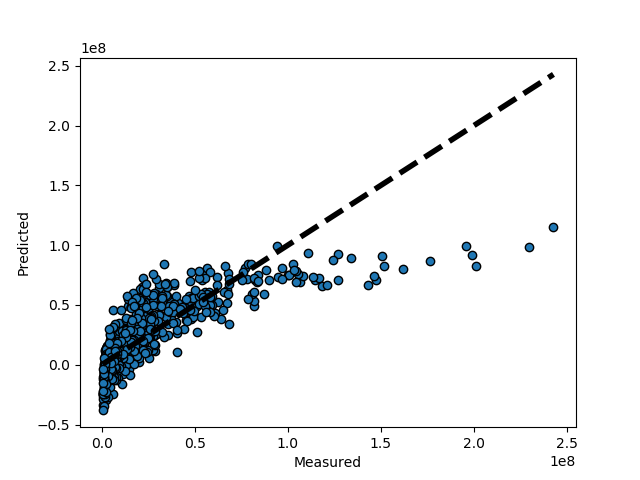

In [9]:
plot_reg(predicted,y)



<IPython.core.display.Javascript object>


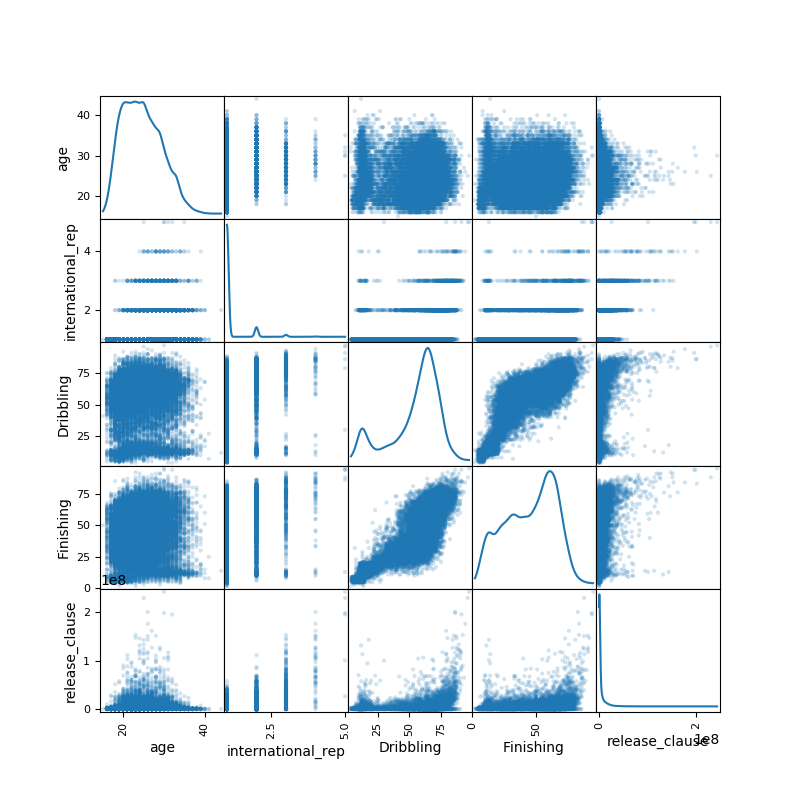

In [10]:
scatter_matrix(df[['age','international_rep','Dribbling','Finishing','release_clause']], alpha=0.2, figsize=(8, 8), diagonal='kde');


<IPython.core.display.Javascript object>


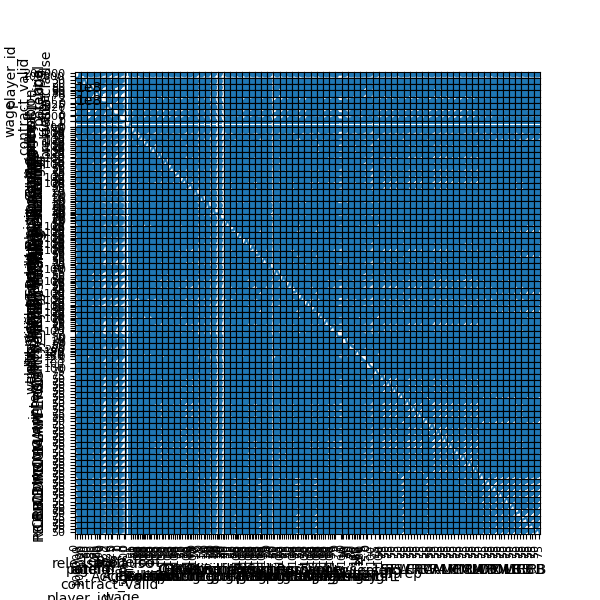

In [11]:
scatter_matrix(df_reg(df)[2], alpha=0.2, figsize=(6, 6), diagonal='kde');

<IPython.core.display.Javascript object>


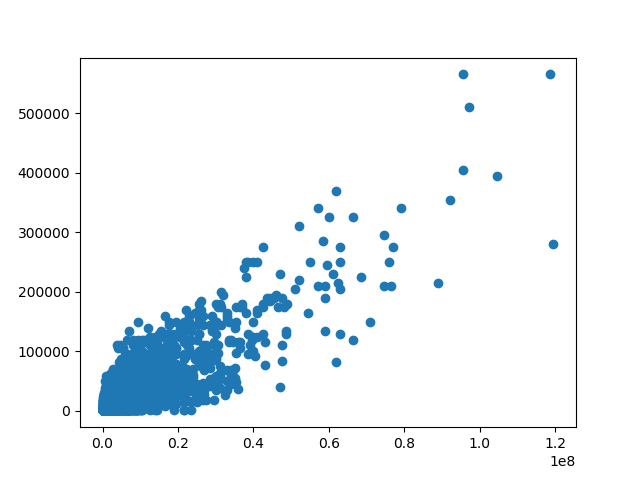

In [12]:
plt.figure()
X = df.value
Y = df.wage
c = df.contract_valid
plt.scatter(X, Y);

<IPython.core.display.Javascript object>


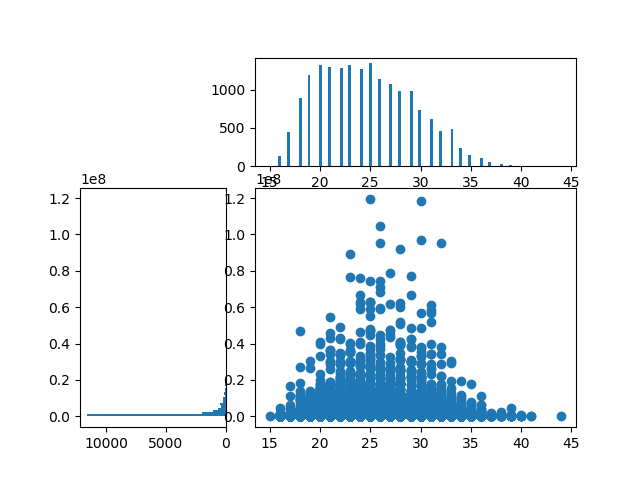

In [13]:
import matplotlib.gridspec as gridspec
plt.figure()
gspec = gridspec.GridSpec(3,3)
top_histogram = plt.subplot(gspec[0, 1: ])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [14]:
y = df.value
x = df.age
lower_right.scatter(x,y)
top_histogram.hist(x, bins = 150)
s = side_histogram.hist(y, bins = 150, orientation= 'horizontal')

In [15]:
top_histogram.clear()
top_histogram.hist(x, bins = 100)
side_histogram.clear()
side_histogram.hist(y, bins = 100, orientation='horizontal')
side_histogram.invert_xaxis()

In [16]:
df.country.unique()

array([nan, 'Romania', 'South Africa', 'United States', 'Czech Republic',
       'Sweden', 'Greece', 'New Zealand', 'Republic of Ireland', 'Norway',
       'Cameroon', 'Poland', 'Chile', 'Finland', 'Canada', 'Wales',
       'Denmark', 'Iceland', 'Australia', 'Northern Ireland', 'Slovenia',
       'Ecuador', 'Scotland', 'Bulgaria', 'Saudi Arabia', 'Venezuela',
       'Turkey', 'Peru', 'Hungary', 'Russia', 'Egypt', "Côte d'Ivoire",
       'Argentina', 'Portugal', 'Brazil', 'Uruguay', 'Germany', 'Spain',
       'Belgium', 'Italy', 'France', 'England', 'Colombia', 'Austria',
       'Netherlands', 'Switzerland', 'Mexico', 'Paraguay', 'Bolivia'], dtype=object)

<IPython.core.display.Javascript object>


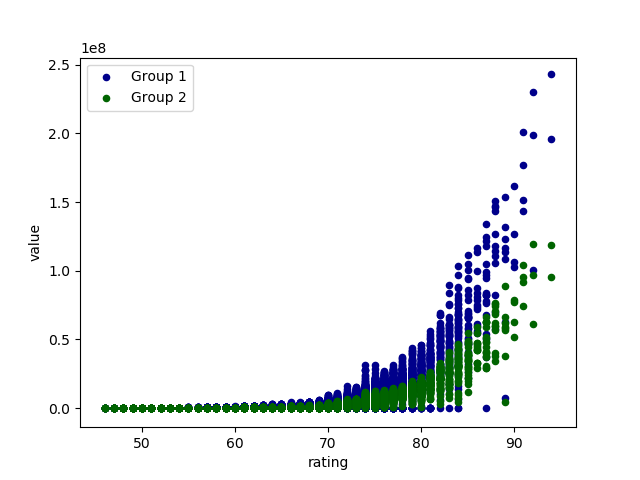

In [17]:
ax = df.plot.scatter(x='rating', y='release_clause', color='DarkBlue', label='Group 1');
df.plot.scatter(x='rating', y='value', color='DarkGreen', label='Group 2', ax=ax);

<IPython.core.display.Javascript object>


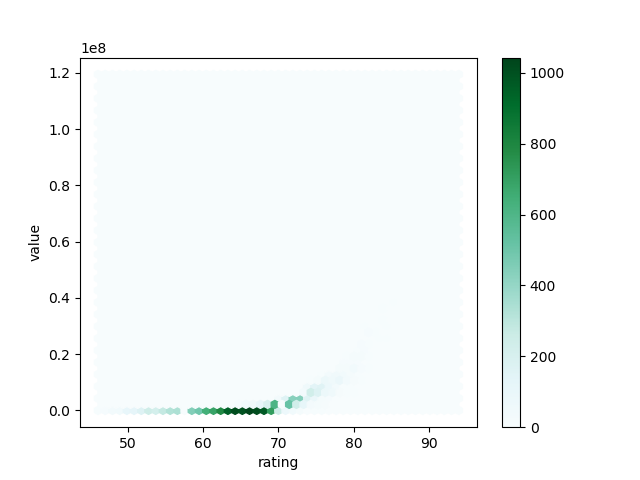

In [18]:
df.plot.hexbin(x='rating', y='value', gridsize=50)